In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


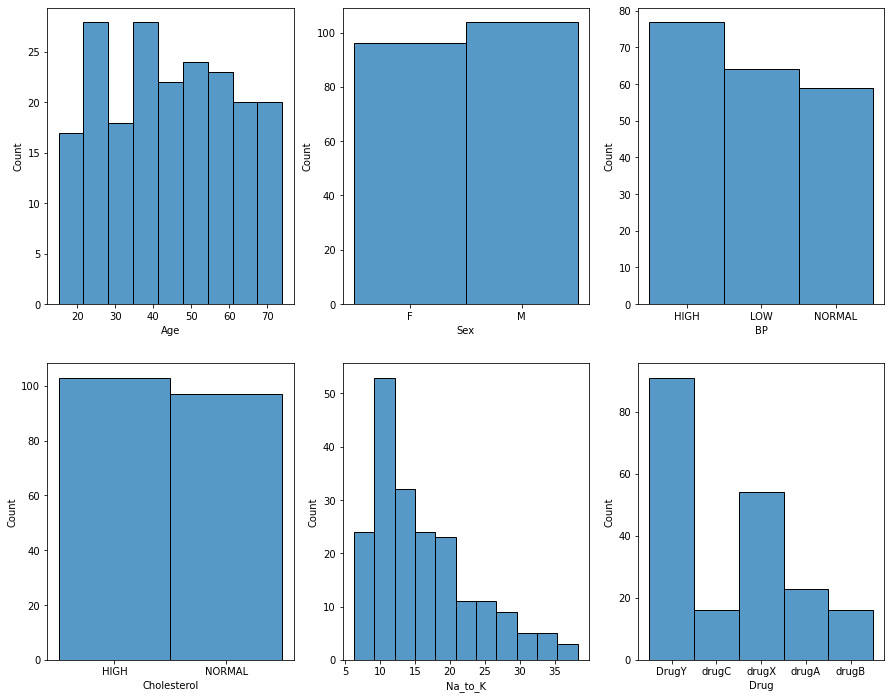

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
ax = ax.flatten()
for i, c in enumerate(df.columns):
    sns.histplot(data=df, x=c, ax=ax[i])
plt.show()

In [7]:
level = {'HIGH':2, 'NORMAL':1, 'LOW':0}
df['BP'].replace(level, inplace=True)
df['Cholesterol'].replace(level, inplace=True)

In [8]:
sex_map = {'F':0, 'M':1}
df['Sex'].replace(sex_map, inplace=True)

In [9]:
label = {'DrugY':0, 'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4}

In [10]:
df['Drug'] = df.Drug.replace(label)

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,0
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,2
4,61,0,0,2,18.043,0


In [12]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, shuffle=True)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
def get_acc(DF):
    DF = DF.copy()
    DF = pd.concat([DF, y_train], axis=1)
    percentage = DF.groupby('cluster').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False)[0])
    drug_names = DF.groupby('cluster').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False).index[0][0])
    final_df = drug_names.to_frame()
    final_df['percentage'] = percentage
    final_df.rename(columns={0:'Drugs'}, inplace=True)
    final_df.sort_values('percentage', ascending=False)
    avg_accuracy = final_df['percentage'].sum()/len(final_df)
    
    return avg_accuracy

# Kmeans

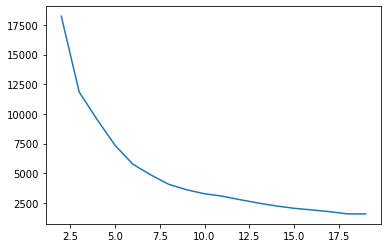

In [46]:
from sklearn.cluster import KMeans
intertia = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_pca)
    intertia[k] = kmeans.inertia_
    
intertia = pd.DataFrame(intertia, index=['Intertia'])
intertia.T['Intertia'].plot()
plt.show()

In [47]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train_pca)
kmeans.labels_

array([0, 7, 6, 7, 0, 2, 6, 2, 3, 4, 8, 4, 0, 8, 7, 3, 2, 7, 0, 8, 6, 6,
       0, 4, 2, 8, 7, 2, 5, 4, 4, 2, 4, 1, 4, 0, 4, 7, 2, 3, 4, 9, 2, 8,
       2, 4, 7, 6, 8, 7, 4, 1, 2, 8, 3, 2, 3, 4, 4, 6, 4, 0, 3, 3, 0, 4,
       5, 1, 2, 1, 4, 5, 3, 4, 3, 4, 2, 3, 4, 7, 9, 5, 2, 5, 7, 2, 6, 7,
       0, 6, 2, 5, 7, 3, 5, 7, 0, 7, 2, 7, 9, 6, 4, 4, 7, 0, 4, 9, 3, 5,
       9, 6, 2, 0, 8, 6, 0, 6, 6, 5, 8, 8, 7, 5, 9, 8, 8, 1, 0, 7, 9, 9,
       3, 0, 5, 7, 6, 4, 9, 0, 3, 2, 1, 7, 6, 6, 3, 2, 6, 3], dtype=int32)

In [59]:
X_train_pca_kemans

,Age,Sex,BP,Cholesterol,Na_to_K,cluster,Drug
80,60,1,2,2,13.934,0,4
182,20,0,0,1,11.686,7,2
174,42,1,2,1,12.766,6,3
106,22,1,1,2,11.953,7,2
158,59,0,0,2,10.444,0,1
...,...,...,...,...,...,...,...
183,36,0,2,1,15.490,6,0
177,25,1,1,2,19.011,3,0
112,35,1,0,1,9.170,2,2
173,41,0,0,1,18.739,6,0


In [52]:
X_train_pca_kemans = X_train.copy()

In [53]:
X_train_pca_kemans['cluster'] = kmeans.labels_

In [55]:
X_train_pca_kemans['Drug'] = y_train

In [18]:
evaluate_df = X_train.copy()
evaluate_df = pd.concat([evaluate_df, y_train], axis=1)
evaluate_df['Clustered'] = kmeans.labels_
label_inverse = {v:k for k, v in label.items()}
percentage = evaluate_df.groupby('Clustered').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False)[0])
drug_names = evaluate_df.groupby('Clustered').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False).index[0][0])
final_df = drug_names.to_frame()
final_df['percentage'] = percentage
final_df.rename(columns={0:'Drugs'}, inplace=True)
final_df.sort_values('percentage', ascending=False)

,Drugs,percentage
Clustered,,
1,DrugY,1.000000
3,DrugY,1.000000
9,DrugY,1.000000
5,DrugY,0.909091
6,DrugY,0.882353
2,drugX,0.550000
8,drugX,0.500000
7,drugX,0.400000
4,drugX,0.391304


In [19]:
avg_acc = {}
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_pca)

    evaluate_df = X_train.copy()
    evaluate_df = pd.concat([evaluate_df, y_train], axis=1)
    evaluate_df['Clustered'] = kmeans.labels_
    label_inverse = {v:k for k, v in label.items()}
    percentage = evaluate_df.groupby('Clustered').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False)[0])
    drug_names = evaluate_df.groupby('Clustered').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False).index[0][0])
    final_df = drug_names.to_frame()
    final_df['percentage'] = percentage
    final_df.rename(columns={0:'Drugs'}, inplace=True)
    final_df.sort_values('percentage', ascending=False)
    avg_accuracy = final_df['percentage'].sum()/len(final_df)
    avg_acc[k] = avg_accuracy

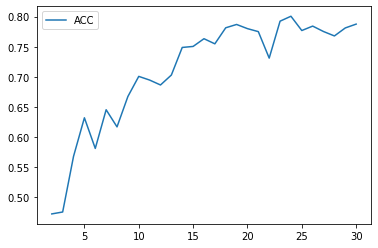

In [20]:
pd.DataFrame(avg_acc, index=['ACC']).T.plot()
plt.show()

Model become more accurate as the number of clusters goes up.
In another word, each cluster become more homogenous.

In [21]:
pcas = {}
for p in range(1, len(X_train.columns)+1):
    pca = PCA(n_components=p)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.fit_transform(X_test)
    
    kmeans = KMeans(n_clusters=10, random_state=0)
    kmeans.fit(X_train_pca)

    evaluate_df = X_train.copy()
    evaluate_df = pd.concat([evaluate_df, y_train], axis=1)
    evaluate_df['Clustered'] = kmeans.labels_
    label_inverse = {v:k for k, v in label.items()}
    percentage = evaluate_df.groupby('Clustered').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False)[0])
    drug_names = evaluate_df.groupby('Clustered').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False).index[0][0])
    final_df = drug_names.to_frame()
    final_df['percentage'] = percentage
    final_df.rename(columns={0:'Drugs'}, inplace=True)
    final_df.sort_values('percentage', ascending=False)
    avg_accuracy = final_df['percentage'].sum()/len(final_df)
    
    pcas[p] = avg_accuracy

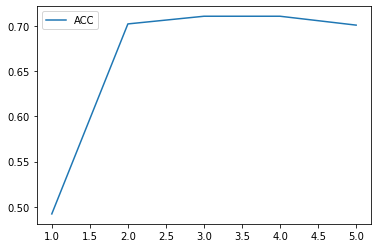

In [22]:
pd.DataFrame(pcas, index=['ACC']).T.plot()
plt.show()

The acc become stable after the number of components are more than two (~70%).

# Dendrogram

In [23]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist

In [24]:
Z = fastcluster.linkage_vector(X_train_pca, method='ward', metric='euclidean')

In [25]:
Z_df = pd.DataFrame(Z, columns=['clusterOne', 'clusterTwo', 'distance', 'newClusterSize'])

In [26]:
Z_df

,clusterOne,clusterTwo,distance,newClusterSize
0,16.0,82.0,0.644000,2.0
1,0.0,12.0,1.000000,2.0
2,54.0,62.0,1.007294,2.0
3,29.0,45.0,1.080030,2.0
4,61.0,105.0,1.086566,2.0
...,...,...,...,...
144,286.0,289.0,57.870043,36.0
145,287.0,290.0,60.563022,36.0
146,291.0,295.0,87.450769,69.0
147,293.0,294.0,93.270148,81.0


In [27]:
from scipy.cluster.hierarchy import fcluster

In [28]:
distance_threshold = 9
cluster = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = pd.DataFrame(data=cluster, index=X_train.index, columns=['cluster'])
print('Number of distinct clusters: ', X_train_hierClustered['cluster'].nunique())

Number of distinct clusters:  28


In [29]:
X_train_hierClustered2 = pd.concat([X_train_hierClustered, y_train], axis=1)

In [30]:
percentage = X_train_hierClustered2.groupby('cluster').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False)[0])
drug_names = X_train_hierClustered2.groupby('cluster').apply(lambda x: x[['Drug']].replace(label_inverse).value_counts(normalize=True).sort_values(ascending=False).index[0][0])
final_df = drug_names.to_frame()
final_df['percentage'] = percentage
final_df.rename(columns={0:'Drugs'}, inplace=True)
final_df.sort_values('percentage', ascending=False)
avg_accuracy = final_df['percentage'].sum()/len(final_df)

In [31]:
avg_accuracy

0.8044990723562152

In [32]:
percentage

cluster
1     0.666667
2     0.333333
3     0.400000
4     0.454545
5     0.750000
6     0.500000
7     1.000000
8     0.833333
9     1.000000
10    1.000000
11    1.000000
12    1.000000
13    0.583333
14    0.666667
15    0.571429
16    1.000000
17    1.000000
18    1.000000
19    1.000000
20    0.833333
21    0.666667
22    1.000000
23    0.600000
24    1.000000
25    0.666667
26    1.000000
27    1.000000
28    1.000000
dtype: float64

This is how it would work on real-world examples: we would apply dimensionality reduction first (such as PCA), then we would perform clustering (such as hierarchical clustering), and finally we would hand-label a few points per cluster. For example, for this MNIST digits dataset, if we did not have any labels, we would look at a few images per cluster and label those images based on the digits they displayed. So long as the clusters were homogeneous enough, the few hand labels we generated could be applied automatically to all the other images in the cluster.


All of a sudden, without much effort, we could have labeled all the images in our 50,000 dataset with a near 77% accuracy. This is impressive and highlights the power of unsupervised learning

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=5, leaf_size=30, n_jobs=4)
X_train_pca_dbscanClustered = db.fit_predict(X_train_pca)
X_train_pca_dbscanClustered = pd.DataFrame(X_train_pca_dbscanClustered, columns=['cluster'])
X_train_pca_dbscanClustered

,cluster
0,3
1,0
2,-1
3,0
4,-1
...,...
145,1
146,6
147,1
148,-1


In [39]:
get_acc(X_train_pca_dbscanClustered)

0.5514352612053761

In [43]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=None, alpha=1.0, cluster_selection_method='eom')
X_train_pca_hdbscanClustered = hdb.fit_predict(X_train_pca)
X_train_pca_hdbscanClustered = pd.DataFrame(X_train_pca_hdbscanClustered, columns=['cluster'])
X_train_pca_hdbscanClustered

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
145,-1
146,-1
147,-1
148,-1


In [44]:
get_acc(X_train_pca_hdbscanClustered)

0.4732142857142857